In [1]:
include("voiConsAuc.jl")

INFO: Recompiling stale cache file /home/wkmor1/.julia/lib/v0.5/Optim.ji for module Optim.
INFO: Precompiling module RCall.
INFO: Using R installation at /usr/lib/R


evsi_plot (generic function with 3 methods)

In [13]:
function sim_evi(μ = [0, 0], σ = [1, 1])
    function g(n)
        f(p) = evsi_sim(μ, σ, [n * p, n * (1 - p)], nsims = 100000)
        vcat(map(f, 1:-.01:0)...)
    end
    hcat(map(g, exp(collect(linspace(log(1), log(50), 101))))...)
end

sim_evi (generic function with 3 methods)

In [26]:
function an_evi(μ = [0, 0], σ = [1, 1])
    function g(n)
        f(p) = evsi_an(μ, σ, [n * p, n * (1 - p)])
        vcat(map(f, 1:-.01:0)...)
    end
    hcat(map(g, exp(collect(linspace(log(1), log(50), 101))))...)
end

an_evi (generic function with 3 methods)

In [45]:
x = sim_evi([1, 0], [1, .5])

101×101 Array{Float64,2}:
  0.0228914     0.0216878   …  0.0820899   0.0803478   0.0772129 
  0.0257666     0.0240622      0.0802389   0.0825359   0.0863157 
  0.0263124     0.0308754      0.0890342   0.0808123   0.0771228 
  0.0204491     0.0265827      0.0856923   0.0827098   0.0894151 
  0.0177116     0.0200357      0.085418    0.0920314   0.089075  
  0.0249368     0.0239825   …  0.0911538   0.0917125   0.0918553 
  0.0293691     0.0225675      0.089343    0.0898444   0.0955565 
  0.0214828     0.0250775      0.092495    0.0907162   0.0958755 
  0.0278973     0.0234382      0.0915097   0.0880071   0.0950142 
  0.0246708     0.0246234      0.0963628   0.0918517   0.0976029 
  0.0209017     0.0233113   …  0.0938654   0.0943611   0.100649  
  0.0231697     0.0273872      0.0921315   0.0964474   0.095311  
  0.0217456     0.0201893      0.0905743   0.0951135   0.09576   
  ⋮                         ⋱                          ⋮         
 -0.000642303  -0.00363957     0.0885926   0.09120

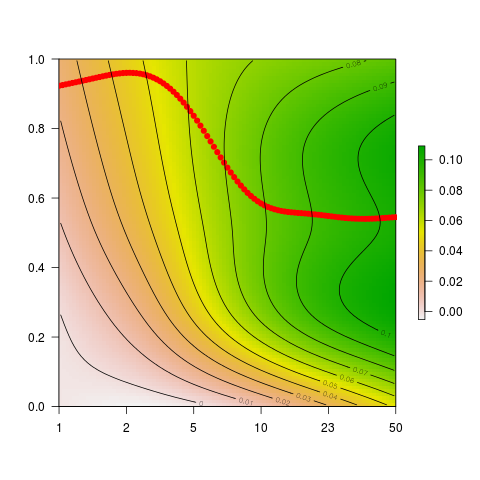

RCall.RObject{RCall.RealSxp}
[1] 0.0 0.2 0.4 0.6 0.8 1.0


In [56]:
R"
    library(raster)
    library(mgcv)
    r = $x
    r = 
      data.frame(
        x = rep(seq_len(ncol(r)), each = nrow(r)),
        y = rep(seq_len(nrow(r)), times = ncol(r)),
        z = c(r)
      )
    r = gam(z ~ te(x, y), data = r)
    r = matrix(fitted(r), ncol = 101)
    r = raster(r)
    x = seq(0, 1, length.out = 101)
    m = 1 - apply($x, 2, which.max) / 101
    plot(r, asp = NA, las = 1, xaxt = 'n')
    points(x, predict(gam(m ~ s(x))), pch = 19, col = 'red')
    contour(r, add = TRUE)
    axis(1, at = 0:5 / 5, label = round(exp(seq(log(1), log(50), length.out = 6))))
"

In [48]:
y = an_evi([1, 0], [1, .5])

101×101 Array{Float64,2}:
 0.0251273    0.026147     0.0271753    …  0.0807543   0.0808506   0.0809433 
 0.0249314    0.0259519    0.0269815       0.0838629   0.0840717   0.0842804 
 0.024733     0.0257541    0.0267848       0.0863824   0.0866632   0.0869448 
 0.024532     0.0255536    0.0265853       0.0884641   0.0887914   0.0891193 
 0.0243283    0.0253504    0.0263829       0.0902114   0.0905688   0.0909261 
 0.0241221    0.0251444    0.0261775    …  0.0916977   0.0920744   0.0924501 
 0.0239132    0.0249356    0.0259693       0.0929764   0.093365    0.0937517 
 0.0237017    0.024724     0.0257581       0.0940871   0.0944826   0.0948753 
 0.0234875    0.0245096    0.0255439       0.0950601   0.095459    0.0958543 
 0.0232706    0.0242923    0.0253268       0.0959186   0.0963185   0.0967141 
 0.023051     0.0240723    0.0251066    …  0.096681    0.0970802   0.0974744 
 0.0228287    0.0238493    0.0248834       0.0973619   0.0977592   0.0981509 
 0.0226037    0.0236234    0.0246572  

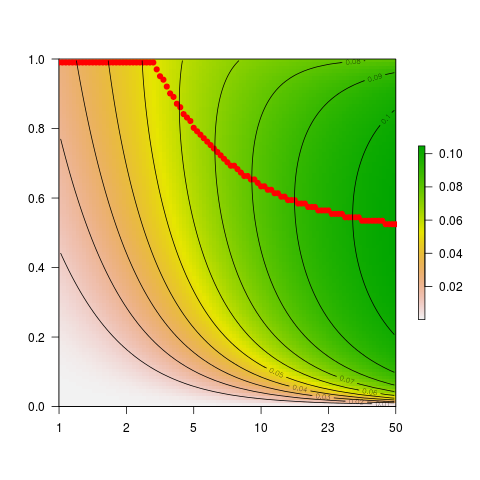

RCall.RObject{RCall.RealSxp}
[1] 0.0 0.2 0.4 0.6 0.8 1.0


In [55]:
R"
    library(raster)
    library(mgcv)
    r = $y
    #r = 
    #  data.frame(
    #    x = rep(seq_len(ncol(r)), each = nrow(r)),
    #    y = rep(seq_len(nrow(r)), times = ncol(r)),
    #    z = c(r)
    #  )
    #r = gam(z ~ te(x, y), data = r)
    #r = matrix(fitted(r), ncol = 101)
    r = raster(r)
    x = seq(0, 1, length.out = 101)
    m = 1 - apply($y, 2, which.max) / 101
    plot(r, asp = NA, las = 1, xaxt = 'n')
    points(x, m, pch = 19, col = 'red')
    contour(r, add = TRUE)
    axis(1, at = 0:5 / 5, label = round(exp(seq(log(1), log(50), length.out = 6))))
"